# MicroSoft Store App Analysis

Microsoft Store (Digital) is a digital distribution platform owned by Microsoft serving as the unified distribution point for apps, console games, and digital videos (like App Store in Apple). Exploratory data analysis of user data always have revealed surprisingly useful insights about the products.  This notebook is an analysis for Microsoft Windows App Data. 

 ***This dataset is downloaded from Kaggle Platform***  
 https://www.kaggle.com/vishnuvarthanrao/windows-store

First, let's load the data set and see what I can analyze from the dataset.  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline 
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
import chart_studio.plotly as py 
import cufflinks as cf 
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot 
init_notebook_mode(connected= True) 
cf.go_offline() 

In [75]:
df = pd.read_csv('msft.csv')

In [76]:
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


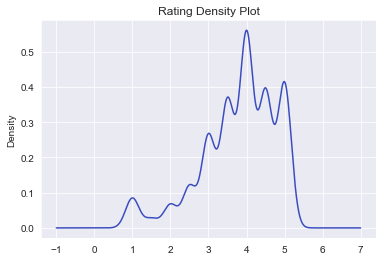

In [77]:
df['Rating'].plot(kind = 'kde',colormap = 'coolwarm')
plt.title('Rating Density Plot')
plt.show()

**This density plot can show that most customers rate the Application around 4.0. I think this is not a bad grade. However, this plot cannot show which category got the highest rating.** 

In [78]:
# Group by Category firstly, and then calculate the average rating for each category  
by_category = df.groupby(by = 'Category')
df_category = round(by_category[['Rating']].mean(),3)
df_category = df_category.reset_index()

In [79]:
sns.set_style('dark')

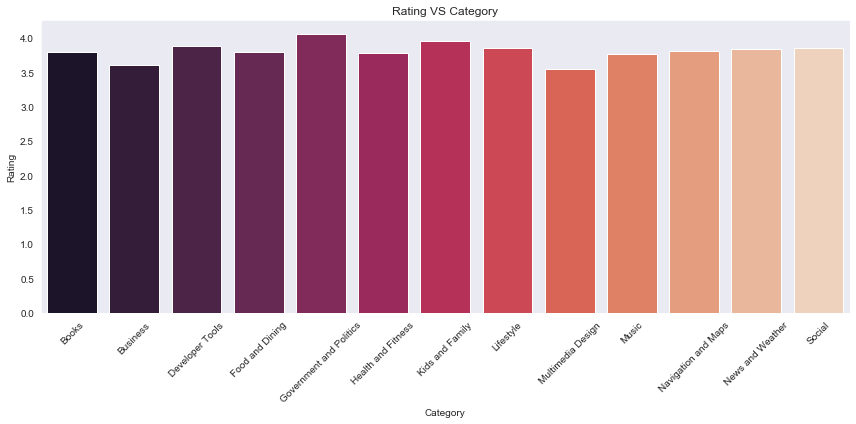

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Category',y = 'Rating',data = df_category, palette="rocket")
plt.title('Rating VS Category')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**From this bar plot, I find that the category "Government and Politics" has the highest average rating.However, we do not know the number of people rate for each category**

So, Let's calculate the total number of people rated for each category and then visualize them

In [81]:
df_category2 = by_category[['No of people Rated']].sum()
df_category2 = df_category2.reset_index()
df3 = pd.merge(df_category,df_category2)
df3.head()

,Category,Rating,No of people Rated
0,Books,3.791,387822
1,Business,3.602,373083
2,Developer Tools,3.886,272678
3,Food and Dining,3.789,91448
4,Government and Politics,4.050,38379


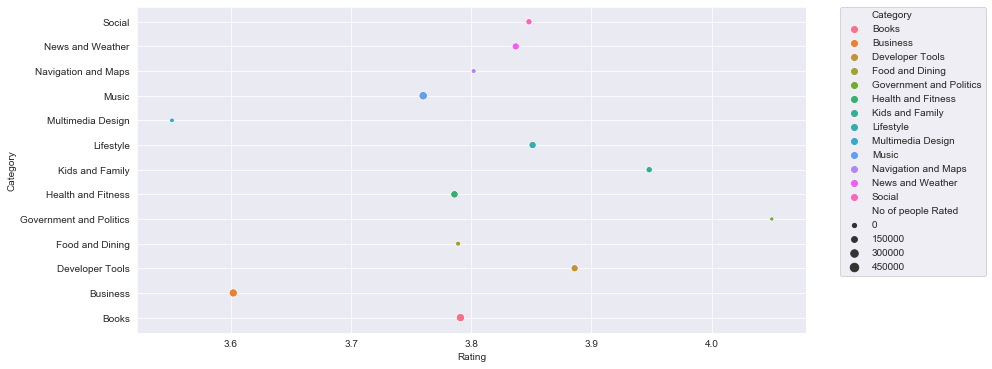

In [82]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Rating',y = 'Category',data = df3,size = 'No of people Rated',hue = 'Category') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**With this scatter plot, I do find some interesting relationships but this plot is still not clear to see the relationship number of people rate each category and rating. In other words, it cannot show clearly which category has the most people rate even though we know that Government and Politics has the highest average rating.** 

So, we should use `plotly` to solve our problem.

In [83]:
fig = px.scatter(df3, x='Rating', y='Category', color='Category',size = 'No of people Rated')
fig.update_layout(title="Average Rating For Each Category")
fig.show()

**Category Music has the most people to rate. So, I want to show the percentage of people rate for each category.**

In [84]:
df3.head()

,Category,Rating,No of people Rated
0,Books,3.791,387822
1,Business,3.602,373083
2,Developer Tools,3.886,272678
3,Food and Dining,3.789,91448
4,Government and Politics,4.050,38379


In [85]:
df['No of people Rated'].sum()

2937069

In [86]:
df3['Percentage (%)'] = round((df3['No of people Rated'] / (df['No of people Rated'].sum()) *100),3)

In [87]:
df3.head()

,Category,Rating,No of people Rated,Percentage (%)
0,Books,3.791,387822,13.204
1,Business,3.602,373083,12.703
2,Developer Tools,3.886,272678,9.284
3,Food and Dining,3.789,91448,3.114
4,Government and Politics,4.050,38379,1.307


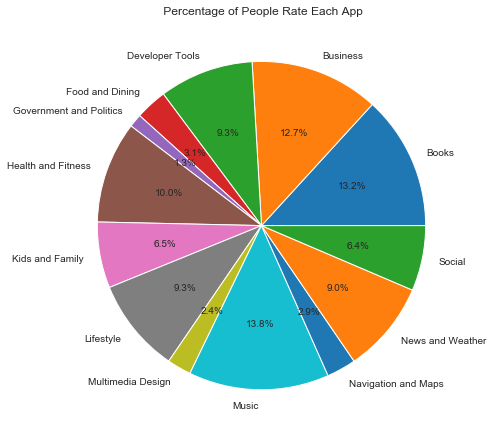

In [97]:
plt.figure(figsize= (15,6))
plt.pie(labels = df3['Category'],x = df3['No of people Rated'],autopct='%1.1f%%')
plt.tight_layout() 
plt.title(' Percentage of People Rate Each App')
plt.show()

**Finally, from this pie chart, we can see that 13.8% people rate the Music App but only 1.3% people rate Government and Politics.**